<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5_DSP25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from IPython.display import Audio
from numpy.fft import fft , ifft , fftfreq


#**音声ファイルを読み込み**

In [ ]:
fs , data = read( "bird_female.wav" )
print( "fs:" , fs )
print( "type(data):" , type(data) )
print( "np.shape(data):" , np.shape(data) )
print( "type(data[0]):" , type(data[0]) )


fs: 16000
type(data): <class 'numpy.ndarray'>
np.shape(data): (16000,)
type(data[0]): <class 'numpy.int16'>


音声を可視化

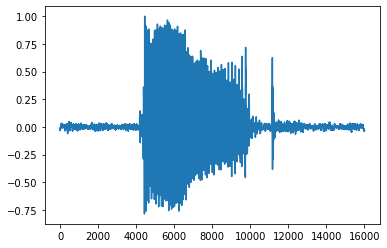

In [ ]:
x = data / np.abs(max(data))
plt.plot( x )

音声を可視化２

Text(0, 0.5, 'Amplitude')

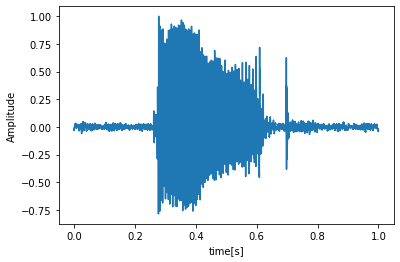

In [ ]:
t = np.arange( 0 , len(x)/fs , 1/fs )
plt.plot( t , x )
plt.xlabel( "time[s]" )
plt.ylabel( "Amplitude" )


音声を聴く

In [ ]:
Audio( x , rate = fs )

音声をフーリエ変換したもの

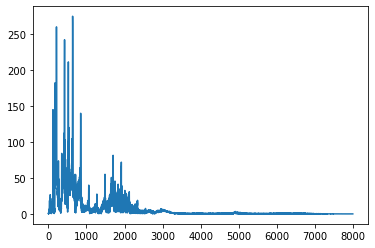

In [ ]:
N_x = len(x)
X = fft(x)

freqs = fftfreq( N_x , d=1/fs )
plt.plot( freqs[:N_x//2] , np.abs(X)[:N_x//2] )


**nfft**:fftをする間隔  
**overlap**:現在の終了位置と次の開始位置がどれだけ被さるか  
**shift**:nfft - overlap

In [ ]:
nfft = 256
overlap = 128
shift = nfft - overlap

ffttimes = (N_x - overlap) // shift
print( "何回fftできるか" , ffttimes )


何回fftできるか 124


In [ ]:
spec = np.zeros( [nfft//2 , ffttimes] )

print( "np.shape(spec):" , np.shape(spec) )


np.shape(spec): (128, 124)


窓関数

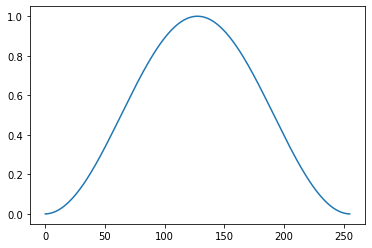

In [ ]:
n = np.arange( nfft )
wn = 0.5 - 0.5 * np.cos( 2*np.pi*(n+0.5)/nfft )

plt.plot( wn )

分析区間の抽出

In [ ]:
for i in range(ffttimes):
  x_i = x[i*shift : i*shift+nfft]
  xw = x_i*wn
  X_i = fft(xw)
  absX_i = np.abs(X_i)
  spec[: , i ] = absX_i[:nfft//2]

行列を画像として出力

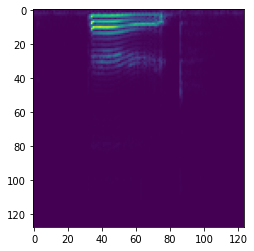

In [ ]:
plt.imshow(spec)

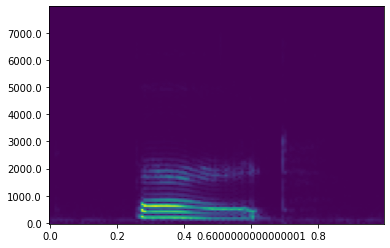

In [ ]:
t_gap = 0.2
t_spec = np.arange( 0 , len(x)/fs , t_gap )
t_position = np.arange( 0 , ffttimes , ffttimes*t_gap )

freq_res = 1000
freq_spec = np.arange( 0 , fs/2 , freq_res )
freq_position = np.arange( 0 , fs/2 , freq_res ) * nfft/fs

plt.imshow( spec , origin='lower' , aspect='auto' )
plt.xticks( t_position , t_spec );
plt.yticks( freq_position , freq_spec );


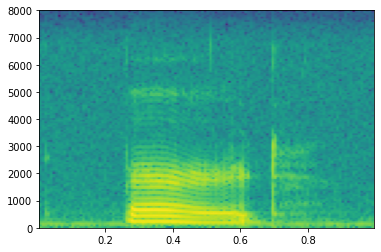

In [ ]:
plt.specgram( x , Fs=fs );

#**周波数分解能と時間分解能を求める**  
**周波数分解能$d_f$**  
**→**2つの測定値間の周波数間隔を表す  
**→**サンプリング周波数fsをサンプリング点数Nで割ったもの   
$$d_f=\frac{f_s}{N}$$  
**時間分解能(サンプリング時間間隔)$s$**  
**→**どれくらい短い間隔で信号を測定できるかを表す  
**→**サンプリング周波数fsの逆数  
$$s=\frac{1}{f_s}$$  
**両者の関係**  
式からも分かる通り反比例の関係になっている  
$$d_f=\frac{f_s}{N}=\frac{1}{Ns}$$


In [ ]:
#上の音源から求める
#周波数分解能d_f
d_f = fs / nfft
print( "周波数分解能" , d_f )
#時間分解能s
s = 1/fs
print( "時間分解能" , s )


周波数分解能 62.5
時間分解能 6.25e-05
